<a href="https://colab.research.google.com/github/princil1a/Princilia/blob/main/Customer_churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Loading the dataset

In [ ]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df.info(),df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(None,
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
 0          1    15634602  Hargrave          619    France  Female   42   
 1          2    15647311      Hill          608     Spain  Female   41   
 2          3    15619304      Onio          502    France  Female   42   
 3          4    15701354      Boni          699    France  Female   39   
 4          5    15737888  Mitchell          850     Spain  Female   43   
 
    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
 0       2       0.00              1          1               1   
 1       1   83807.86              1          0               1   
 2       8  159660.80              3          1               0   
 3       1       0.00              2          0               0   
 4       2  125510.82              1          1               1   
 
    EstimatedSalary  Exited  
 0        101348.88       1  
 1        112542.58       0  
 2        113931.57       1  
 3         93826.

Dropping unnecessary columns

In [ ]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

Encoding categorical variables

In [ ]:
le=LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender']) #Male=1, Female=0
df=pd.get_dummies(df,columns=['Geography'],drop_first=True)

Splitting into features and target variable

In [ ]:
X=df.drop(columns=['Exited'])
y=df['Exited']

Scaling numerical features

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

Splitting the data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)


Training a random forest model

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predictions

In [ ]:
y_pred = model.predict(X_test)

Evaluating the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.866
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



Confusion matrix

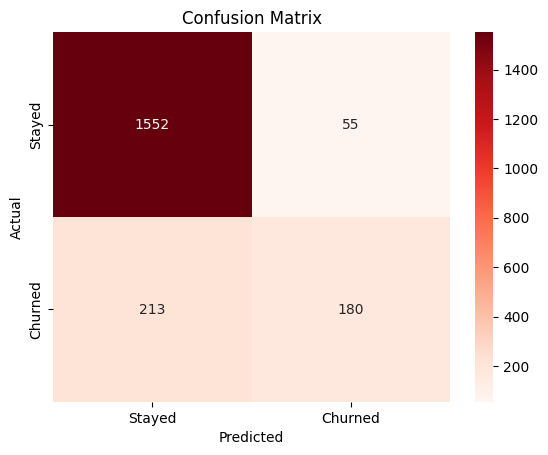

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Feature importance

In [ ]:
feat_importance = pd.DataFrame({"Feature": X.columns, "Importance": model.feature_importances_})
feat_importance = feat_importance.sort_values(by="Importance", ascending=False)
print(feat_importance)

              Feature  Importance
2                 Age    0.239783
8     EstimatedSalary    0.146638
0         CreditScore    0.144214
4             Balance    0.138613
5       NumOfProducts    0.130255
3              Tenure    0.082427
7      IsActiveMember    0.041110
9   Geography_Germany    0.025711
1              Gender    0.019258
6           HasCrCard    0.018722
10    Geography_Spain    0.013268


Plotting the feature importance

<ipython-input-34-c3b3187d7644>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance["Importance"], y=feat_importance["Feature"], palette="Greens")


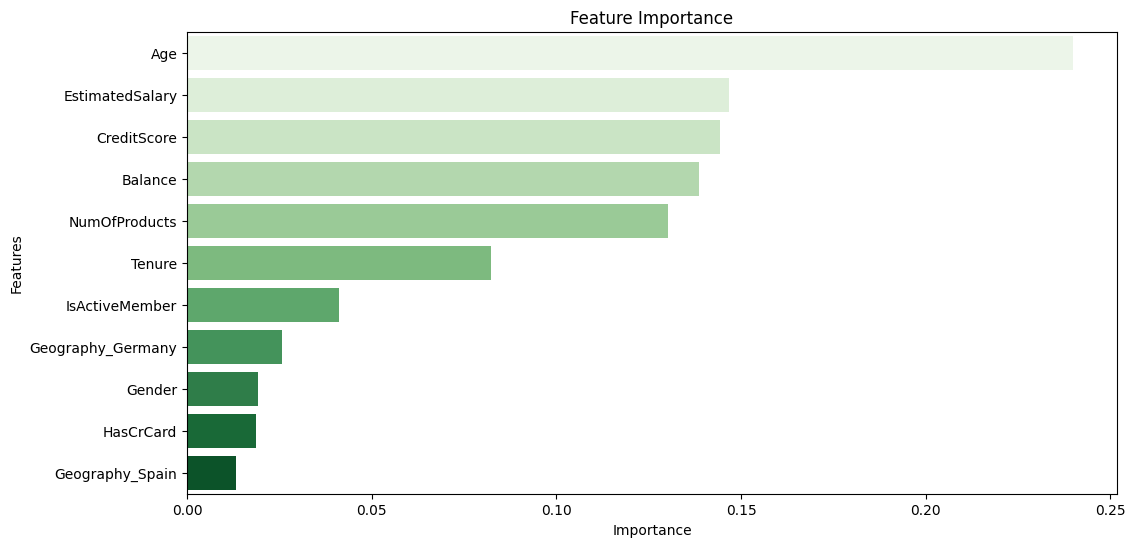

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importance["Importance"], y=feat_importance["Feature"], palette="Greens")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Applying KMeans clustering

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

Reducing dimensions for visualization

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
print(X_pca)

[[-0.52681948 -0.37601399]
 [-0.72631782 -2.09583403]
 [ 0.00990015  2.11637355]
 ...
 [-0.63017814 -0.4387183 ]
 [ 1.08328972  1.22948038]
 [ 0.64563521  0.01309985]]


Plotting KMeans clustering

Cluster 0: High-value customers who are less likely to churn.

Cluster 1: Customers with moderate engagement.

Cluster 2: High-risk customers more likely to churn.

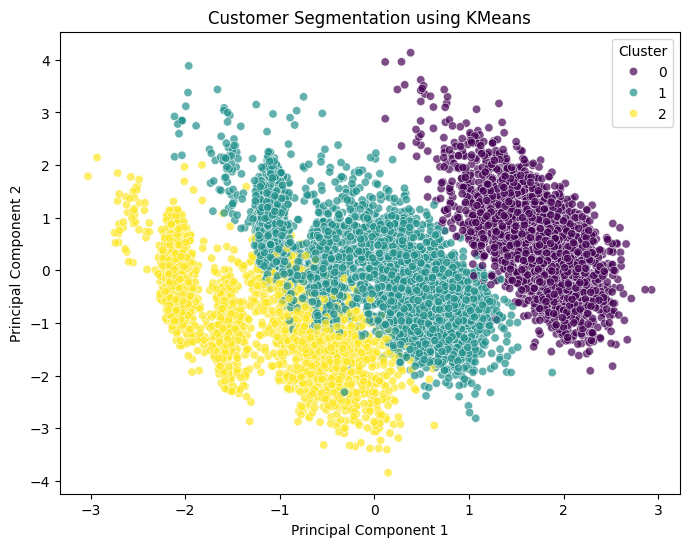

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title("Customer Segmentation using KMeans")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()